# Java Frameworks

## Web Services

Un servicio web es un conjunto de protocolos abiertos y estandares para pasar datos entre aplicaciones

<ul>
<li>Funcion que esta disponible y es accesible por red(local o www)</li>
<li>Utilizan protocolos TCP/IP, HTTP, HTTPS</li>
<li>Los datos se transmiten en formato JSON o XML por lo que son independientes de cualquier lenguaje.</li>
</ul>

### Web Services structure

![ws-structure.PNG](ws-structure.PNG)


Un servicio web recibe datos por medio del request body y regresa datos por medio del response body.
![reqres.PNG](reqres.PNG)

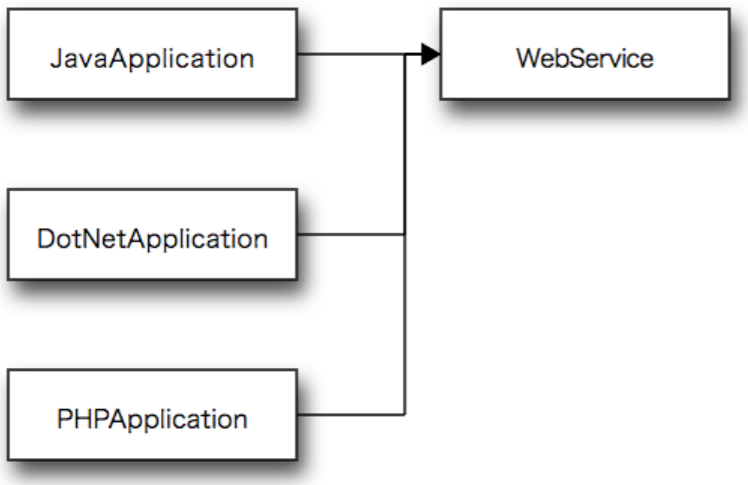
    

### Data formats

#### Java Class (Spring boot)
```java
    public class CMUser {

	@Id
	@GeneratedValue(strategy = GenerationType.IDENTITY)
	@Column(name="Id")
	private Integer id;

	@Column(name="Name")
	@NotBlank(message = "Name is mandatory")
	private String name;

	@Column(name="Email", unique = true)
	@NotBlank(message = "Email is mandatory")
	private String email;
 
	@Column(name="Password")
	@NotBlank(message = "password is mandatory")
	private String password;
    
    //Getters & Setters

}
```

#### JSON(JavaScript Object Notation)
```javascript
    {
	"id": 1,
	"name": "Orlando Loza",
	"email": "orlandolozaarr@gmail.com",
	"password": "password"
    }
```

#### XML
```xml
    <userRequest> 
        <id>1</id>
        <name>Orlando Loza</name>
        <email>orlandolozaarr@gmail.com</email>
        <password>password</password>
    </userRequest>
```

## SOA(Service Oriented Application) Architecture vs Monolithic Architecture
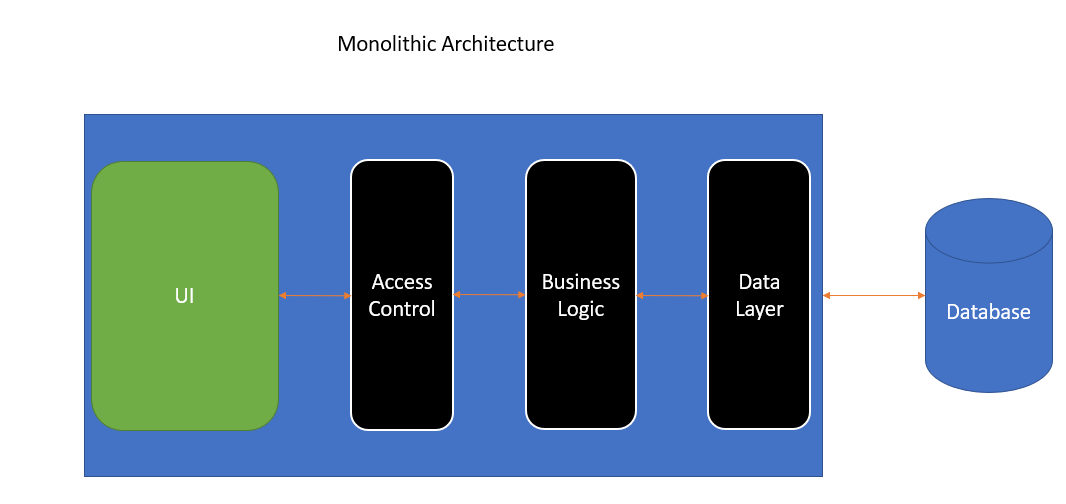  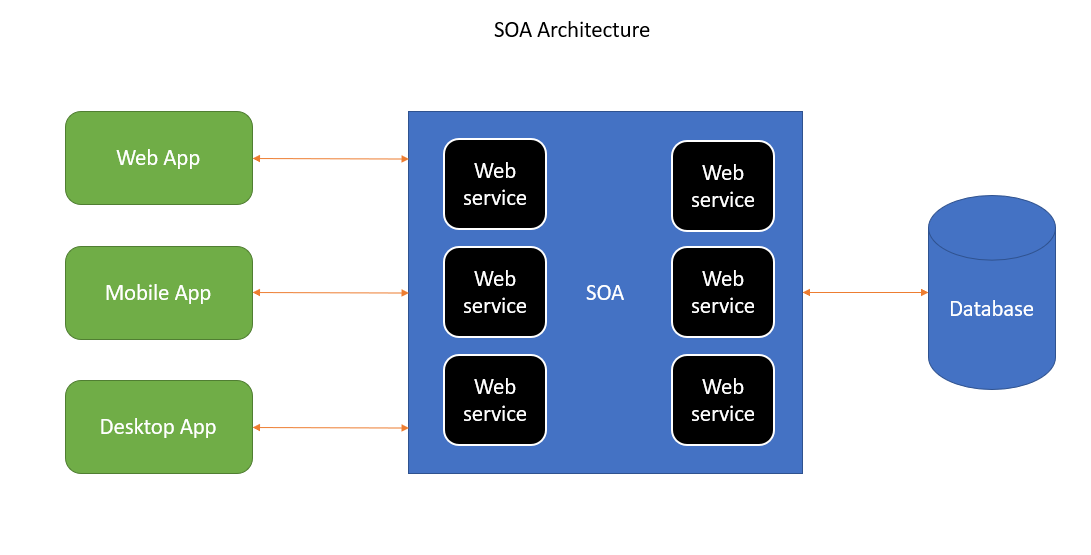






# Rest Services

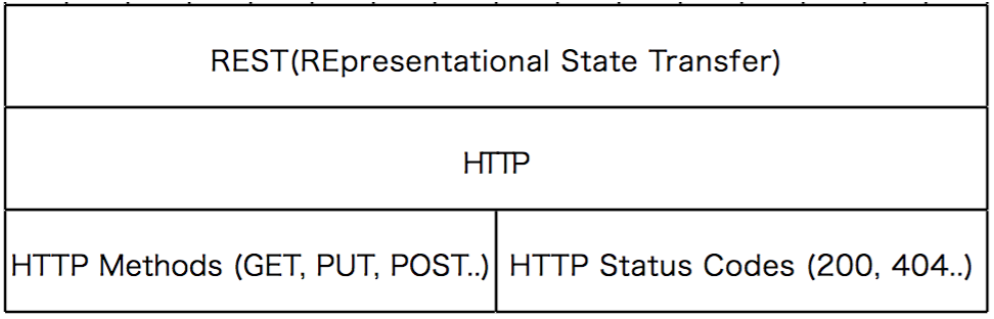


## crear un RESTful web service en spring boot 

### Pasos para crear un un proyecto rest que guarde informacion de canciones y albums

<ul>
    <li>MySql tables</li>
    <li>Entity java classes</li>
    <li>Repository java classes</li>
    <li>Service logic java classes</li>
    <li>Rest Controller Java Classes</li>
    <li>Postman rest client test</li>
</ul>

### MySql tables
Tabla albums
```sql
CREATE TABLE `albums` (
  `Id` int(11) NOT NULL AUTO_INCREMENT,
  `Title` varchar(50) NOT NULL,
  `Release_Date` Date NOT NULL,
  `Price` varchar(100) NOT NULL,
  `Genre` varchar(150) NOT NULL,
  PRIMARY KEY (`Id`)
) ENGINE=InnoDB DEFAULT CHARSET=latin1;
```

Tabla songs
```sql
CREATE TABLE `songs` (
  `Id` int(11) NOT NULL AUTO_INCREMENT,
  `Album_Id` int(11) NOT NULL,
  `Title` varchar(50) NOT NULL,
  `Time` varchar(50) NOT NULL,
  PRIMARY KEY (`Id`),
  CONSTRAINT `sings_ibfk_1` FOREIGN KEY (`Album_Id`) REFERENCES `albums` (`Id`)
) ENGINE=InnoDB DEFAULT CHARSET=latin1;
```

### Entity
Las clases Entity representan en clases en java las tablas que existen en la base de datos.
por cada tabla existente en la base de datos necesitamos una clase Entity que este mapeada a esa tabla 
en donde los campos de la tabla los mapeamos a variables en la clase.

#### JPA & MySql Dependacies
Para poder crear una conexion a base de datos necesitamos librerias tanto de my sql como de hibernate que es el 
framework para base de datos que estaremos utilizando.

```xml
    <!-- JPA(Java Persistance API) library-->
    <dependency>
		<groupId>org.springframework.boot</groupId>
		<artifactId>spring-boot-starter-data-jpa</artifactId>
	</dependency>
    <!-- mysql library-->
    <dependency>
		<groupId>mysql</groupId>
		<artifactId>mysql-connector-java</artifactId>
		<scope>runtime</scope>
    </dependency>
```

Clases en java necesarias
Clase Album
```java
@Entity(name = "albums")
@JsonIgnoreProperties({"hibernateLazyInitializer", "handler"})
public class Album {

	@Id
	@GeneratedValue(strategy = GenerationType.IDENTITY)
	@Column(name="Id")
	private Integer id;

	@Column(name="Title")
	private String title;

	@Column(name="Release_Date", unique = true)
	private Date releaseDate;

	@Column(name="Price", unique = true)
	private String price;
	
	@Column(name="Genre", unique = true)
	private String genre;
    
    //Setters & Getters
}
```

Clase Song
```java
@Entity(name = "songs")
@JsonIgnoreProperties({"hibernateLazyInitializer", "handler"})
public class Song {

	@Id
	@GeneratedValue(strategy = GenerationType.IDENTITY)
	@Column(name="Id")
	private Integer id;
    
    @Column(name="Album_Id")
	private Integer albumId;

	@Column(name="Title")
	private String title;

	@Column(name="Time")
	private String time;

	@Column(name="Genre")
	private String genre;
    
    //Setters & Getters
}
```

### Repository

los repositorios en spring boot son las conexiones a la base de datos utilizando Hibernate y JPA
son interfaces en java que heredan de la interfaz JPARepository<Entity, Primary Key>
al heredar de esta clase y apuntar a la entidad que queremos utilizar automaticamente tenemos las operaciones 
basicas tipo CRUD(Create, Read, Update, Delete).

```java
public interface AlbumRepository extends JpaRepository<Album, Integer> {
	
}
```

```java
public interface SongRepository extends JpaRepository<Song, Integer> {
	
}
```